# ❤️❤️❤️ Speed Dating ❤️❤️❤️

 We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*
***

## Necessary imports

In [2]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


In [3]:
url = 'https://raw.githubusercontent.com/Swellisgood/pythonista-data-science-ninja/main/speed-dating/Speed%20Dating%20Data.csv'
df_raw = pd.read_csv(url, encoding = "ISO-8859-1")

In [81]:
df = df_raw.copy()
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

For this analysis we are trying to determine the factors at play when getting a second date out of such events, by inspecting the dataset key documentation we see that we can get rid of some columns outright. Columns that end with the following series of characters will be dropped : "_2" and "_3", since they refer to answers to questionnaires sent as a follow up after the night of the event. 

In [82]:
#drop columns which names end with '_2' and '_3'
df = df.loc[:, ~df.columns.str.endswith('_2')]
df = df.loc[:, ~df.columns.str.endswith('_3')]

In [83]:
#drop columns with more than 50% of missing values
df = df.loc[:, df.isnull().sum()/len(df) < 0.5]
df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,length
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,2.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,2.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,2.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,2.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,2.0


In [84]:
df = df.drop(['position','positin1','condtn','partner','pid','length','zipcode', 'undergra', 'from'], axis=1)

In [85]:
df.shape

(8378, 97)

In [86]:
print(f'previous DataFrame shape was : {df_raw.shape} ')
print(f'new DataFrame shape is : {df.shape} \n')

col_removed = df_raw.shape[1] - df.shape[1]
missing_ratio_mean = (df.isna().sum() *100 / len(df)).mean()
old_missing_ratio_mean = (df_raw.isna().sum() *100 / len(df_raw)).mean() 

print(f'We have a mean of {missing_ratio_mean:.2f} % of missing values in the new DataFrame by removing {col_removed} columns, instead of a previous mean {old_missing_ratio_mean:.2f} % of missing values before cleaning the DataFrame')

previous DataFrame shape was : (8378, 195) 
new DataFrame shape is : (8378, 97) 

We have a mean of 5.74 % of missing values in the new DataFrame by removing 98 columns, instead of a previous mean 26.44 % of missing values before cleaning the DataFrame


In [233]:
df.isna().sum().sort_values(ascending=False).head(10)

income      4000
amb5_1      3419
total5_1    3419
attr5_1     3419
sinc5_1     3419
intel5_1    3419
fun5_1      3419
attr4_1     1869
total4_1    1869
sinc4_1     1869
dtype: int64

The dataset contains answers to a quizz that will allow us to delve into the specifics and extract more insightful conclusions.
Unfortunately, the dataset contains a lot of issues that will need to be adressed :
* Missing values : some answers weren't given by participants due to different reasons and which the origins are not in the scope of this study.
* Out-of-scale ratings : the instructions for some waves of participants were to rate attributes on a scale of 1 to 10 and other waves were instructed to distribute a 100 points among the 6 attributes we will need a way of normalizing all the data to a 100 scale



In [88]:
df['pf_o_total'] = df['pf_o_att'] + df['pf_o_sin'] + df['pf_o_int'] + df['pf_o_fun'] + df['pf_o_amb'] + df['pf_o_sha']
df['total1_1'] = df['attr1_1'] + df['sinc1_1'] + df['intel1_1'] + df['fun1_1'] + df['amb1_1'] + df['shar1_1']
df['total2_1'] = df['attr2_1'] + df['sinc2_1'] + df['intel2_1'] + df['fun2_1'] + df['amb2_1'] + df['shar2_1']
df['total3_1'] = df['attr3_1'] + df['sinc3_1'] + df['intel3_1'] + df['fun3_1'] + df['amb3_1']
df['total4_1'] = df['attr4_1'] + df['sinc4_1'] + df['intel4_1'] + df['fun4_1'] + df['amb4_1'] + df['shar4_1']
df['total5_1'] = df['attr5_1'] + df['sinc5_1'] + df['intel5_1'] + df['fun5_1'] + df['amb5_1']




#scale the score to 100 if it is over 100 and check if it is now 100
if df['pf_o_total'].max() != 100 :
    df['pf_o_att'] = df['pf_o_att'] * 100 / df['pf_o_total']
    df['pf_o_sin'] = df['pf_o_sin'] * 100 / df['pf_o_total']
    df['pf_o_int'] = df['pf_o_int'] * 100 / df['pf_o_total']
    df['pf_o_fun'] = df['pf_o_fun'] * 100 / df['pf_o_total']
    df['pf_o_amb'] = df['pf_o_amb'] * 100 / df['pf_o_total']
    df['pf_o_sha'] = df['pf_o_sha'] * 100 / df['pf_o_total']

if df['total1_1'].max() != 100 :
    df['attr1_1'] = df['attr1_1'] * 100 / df['total1_1']
    df['sinc1_1'] = df['sinc1_1'] * 100 / df['total1_1']
    df['intel1_1'] = df['intel1_1'] * 100 / df['total1_1']
    df['fun1_1'] = df['fun1_1'] * 100 / df['total1_1']
    df['amb1_1'] = df['amb1_1'] * 100 / df['total1_1']
    df['shar1_1'] = df['shar1_1'] * 100 / df['total1_1']

if df['total2_1'].max() != 100 :
    df['attr2_1'] = df['attr2_1'] * 100 / df['total2_1']
    df['sinc2_1'] = df['sinc2_1'] * 100 / df['total2_1']
    df['intel2_1'] = df['intel2_1'] * 100 / df['total2_1']
    df['fun2_1'] = df['fun2_1'] * 100 / df['total2_1']
    df['amb2_1'] = df['amb2_1'] * 100 / df['total2_1']
    df['shar2_1'] = df['shar2_1'] * 100 / df['total2_1']

if df['total3_1'].max() != 100 :
    df['attr3_1'] = df['attr3_1'] * 100 / df['total3_1']
    df['sinc3_1'] = df['sinc3_1'] * 100 / df['total3_1']
    df['intel3_1'] = df['intel3_1'] * 100 / df['total3_1']
    df['fun3_1'] = df['fun3_1'] * 100 / df['total3_1']
    df['amb3_1'] = df['amb3_1'] * 100 / df['total3_1']

if df['total4_1'].max() != 100 :
    df['attr4_1'] = df['attr4_1'] * 100 / df['total4_1']
    df['sinc4_1'] = df['sinc4_1'] * 100 / df['total4_1']
    df['intel4_1'] = df['intel4_1'] * 100 / df['total4_1']
    df['fun4_1'] = df['fun4_1'] * 100 / df['total4_1']
    df['amb4_1'] = df['amb4_1'] * 100 / df['total4_1']
    df['shar4_1'] = df['shar4_1'] * 100 / df['total4_1']
    
if df['total5_1'].max() != 100 :
    df['attr5_1'] = df['attr5_1'] * 100 / df['total5_1']
    df['sinc5_1'] = df['sinc5_1'] * 100 / df['total5_1']
    df['intel5_1'] = df['intel5_1'] * 100 / df['total5_1']
    df['fun5_1'] = df['fun5_1'] * 100 / df['total5_1']
    df['amb5_1'] = df['amb5_1'] * 100 / df['total5_1']


df['pf_o_total'] = df['pf_o_att'] + df['pf_o_sin'] + df['pf_o_int'] + df['pf_o_fun'] + df['pf_o_amb'] + df['pf_o_sha']
df['total1_1'] = df['attr1_1'] + df['sinc1_1'] + df['intel1_1'] + df['fun1_1'] + df['amb1_1'] + df['shar1_1']
df['total2_1'] = df['attr2_1'] + df['sinc2_1'] + df['intel2_1'] + df['fun2_1'] + df['amb2_1'] + df['shar2_1']
df['total3_1'] = df['attr3_1'] + df['sinc3_1'] + df['intel3_1'] + df['fun3_1'] + df['amb3_1']
df['total4_1'] = df['attr4_1'] + df['sinc4_1'] + df['intel4_1'] + df['fun4_1'] + df['amb4_1'] + df['shar4_1']
df['total5_1'] = df['attr5_1'] + df['sinc5_1'] + df['intel5_1'] + df['fun5_1'] + df['amb5_1']

Now that all the scores are normalized and that everything makes more sense, we can begin the exploratory data analysis !

Let's form a DataFrame for each set of answers in order to isolate them and better prepare the data (if we focus on those answers specifically, we ensure that we only drop what we really need to and keep the optimum amount of answers) thus approaching the most accurate representation possible of everyone's state of mind. 

In [90]:
#function to concatenate the features
def concat_features(data, x):
    df_features = pd.concat([data[["gender","match", "dec", "dec_o"]],data.loc[:,f"attr{x}":f"shar{x}"]], axis=1).copy()
    return df_features


In [91]:
df0 = concat_features(df, "")
df1_1 = concat_features(df, "1_1")
df2_1 = concat_features(df, "2_1")
df3_1 = pd.concat([df[["gender","match", "dec", "dec_o"]],df.loc[:,"attr3_1":"amb3_1"]], axis=1).copy()
df4_1 = concat_features(df, "4_1")
df5_1 = pd.concat([df[["gender","match", "dec", "dec_o"]],df.loc[:,"attr5_1":"amb5_1"]], axis=1).copy()

In [92]:
def get_nan_summary(data):
        """function to get the number of NaN values, the shape of the dataset and the percentage of NaN values in the dataset"""
        perc_nan = round(data.isna().sum().sum()/(data.shape[0]*data.shape[1])*100,2)

        # print("Number of NaN values in the dataset: ", data.isna().sum().sum())
        print("Shape of the dataset: ", data.shape)
        print("Percentage of NaN values in the dataset: ", perc_nan,"%")


In [93]:
nim = ["df","df0", "df1_1", "df2_1", "df3_1", "df4_1", "df5_1"]
nim_obj = [df, df0, df1_1, df2_1, df3_1, df4_1, df5_1]
for data in nim_obj:
    print(nim.pop(0))   
    get_nan_summary(data)
    print("-"*50)

print("NaN Summary complete !")

df
Shape of the dataset:  (8378, 103)
Percentage of NaN values in the dataset:  6.14 %
--------------------------------------------------
df0
Shape of the dataset:  (8378, 10)
Percentage of NaN values in the dataset:  3.47 %
--------------------------------------------------
df1_1
Shape of the dataset:  (8378, 10)
Percentage of NaN values in the dataset:  0.87 %
--------------------------------------------------
df2_1
Shape of the dataset:  (8378, 10)
Percentage of NaN values in the dataset:  0.64 %
--------------------------------------------------
df3_1
Shape of the dataset:  (8378, 9)
Percentage of NaN values in the dataset:  0.7 %
--------------------------------------------------
df4_1
Shape of the dataset:  (8378, 10)
Percentage of NaN values in the dataset:  13.69 %
--------------------------------------------------
df5_1
Shape of the dataset:  (8378, 9)
Percentage of NaN values in the dataset:  23.02 %
--------------------------------------------------
NaN Summary complete !


In [79]:
df.shape

(8378, 97)

In [184]:
#check number of rows where all attributes are nan
print(df[df['attr'].isnull() & df['sinc'].isnull() & df['intel'].isnull() & df['fun'].isnull() & df['amb'].isnull() & df['shar'].isnull()].shape)
print(df[df['attr_o'].isnull() & df['sinc_o'].isnull() & df['intel_o'].isnull() & df['fun_o'].isnull() & df['amb_o'].isnull() & df['shar_o'].isnull()].shape)
print(df[df['attr1_1'].isnull() & df['sinc1_1'].isnull() & df['intel1_1'].isnull() & df['fun1_1'].isnull() & df['amb1_1'].isnull() & df['shar1_1'].isnull()].shape)
print(df[df['attr2_1'].isnull() & df['sinc2_1'].isnull() & df['intel2_1'].isnull() & df['fun2_1'].isnull() & df['amb2_1'].isnull() & df['shar2_1'].isnull()].shape)
print(df[df['attr3_1'].isnull() & df['sinc3_1'].isnull() & df['intel3_1'].isnull() & df['fun3_1'].isnull() & df['amb3_1'].isnull()].shape)
print(df[df['attr4_1'].isnull() & df['sinc4_1'].isnull() & df['intel4_1'].isnull() & df['fun4_1'].isnull() & df['amb4_1'].isnull() & df['shar4_1'].isnull()].shape)
print(df[df['attr5_1'].isnull() & df['sinc5_1'].isnull() & df['intel5_1'].isnull() & df['fun5_1'].isnull() & df['amb5_1'].isnull()].shape)
print("-"*100)

#drop rows where all attributes are nan and display the number of rows dropped
print(df.shape)
df.drop(df[df['attr'].isnull() & df['sinc'].isnull() & df['intel'].isnull() & df['fun'].isnull() & df['amb'].isnull() & df['shar'].isnull()].index, inplace=True)
print(df.shape)
#drop rows where all attributes are nan and display the number of rows dropped
print(df.shape)
df.drop(df[df['attr_o'].isnull() & df['sinc_o'].isnull() & df['intel_o'].isnull() & df['fun_o'].isnull() & df['amb_o'].isnull() & df['shar_o'].isnull()].index, inplace=True)
print(df.shape)

#drop rows where all attributes are nan and display the number of rows dropped
print ('df1_1',df1_1.shape)
df1_1.dropna(subset=['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'], inplace=True)
print ('df1_1',df1_1.shape)

print ('df2_1',df2_1.shape)
df2_1.dropna(subset=['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'], inplace=True)
print ('df2_1',df2_1.shape)

print ('df3_1',df3_1.shape)
df3_1.dropna(subset=['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'], inplace=True)
print ('df3_1',df3_1.shape)

print ('df4_1',df4_1.shape)
df4_1.dropna(subset=['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'], inplace=True)
print ('df4_1',df4_1.shape)

print('df5_1',df5_1.shape)
df5_1.dropna(subset=['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'], inplace=True)
print('df5_1',df5_1.shape)

(0, 104)
(0, 104)
(107, 104)
(78, 104)
(94, 104)
(1869, 104)
(3419, 104)
----------------------------------------------------------------------------------------------------
(8110, 104)
(8110, 104)
(8110, 104)
(8110, 104)
df1_1 (8257, 10)
df1_1 (8257, 10)
df2_1 (8289, 10)
df2_1 (8289, 10)
df3_1 (8273, 9)
df3_1 (8273, 9)
df4_1 (6467, 10)
df4_1 (6467, 10)
df5_1 (4906, 9)
df5_1 (4906, 9)


## 🔍 Who is participating to this speed dating event ? - Exploratory Data Analysis 🔍

---

Let's explore the dataset in terms of defining features that describe the participants.
Age, gender, race, field of study, and more will be explored here. \
We know that these events were dedicated to **partners of the *opposite* gender**. \
In this intance, we have a dataset composed of :

In [94]:
personal = ['gender', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'match_es']
decision = ['match','dec', 'dec_o'
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
answers = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']


speed_dating_df = df[['iid', 'wave'] + personal].drop_duplicates().copy()

In [95]:
speed_dating_df['gender'] = speed_dating_df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(speed_dating_df.gender)
speed_dating_df.gender.value_counts(dropna=False)

Male      277
Female    274
Name: gender, dtype: int64

In [96]:
# assign all NaN values in the age column to the average age
speed_dating_df["age"] = speed_dating_df["age"].fillna(round(speed_dating_df["age"].median(),1))
speed_dating_df["age"] = speed_dating_df["age"].astype(int)

speed_dating_df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])


age                     
             mean median min max count
gender                                
Female  26.124088   26.0  19  55   274
Male    26.581227   27.0  18  42   277

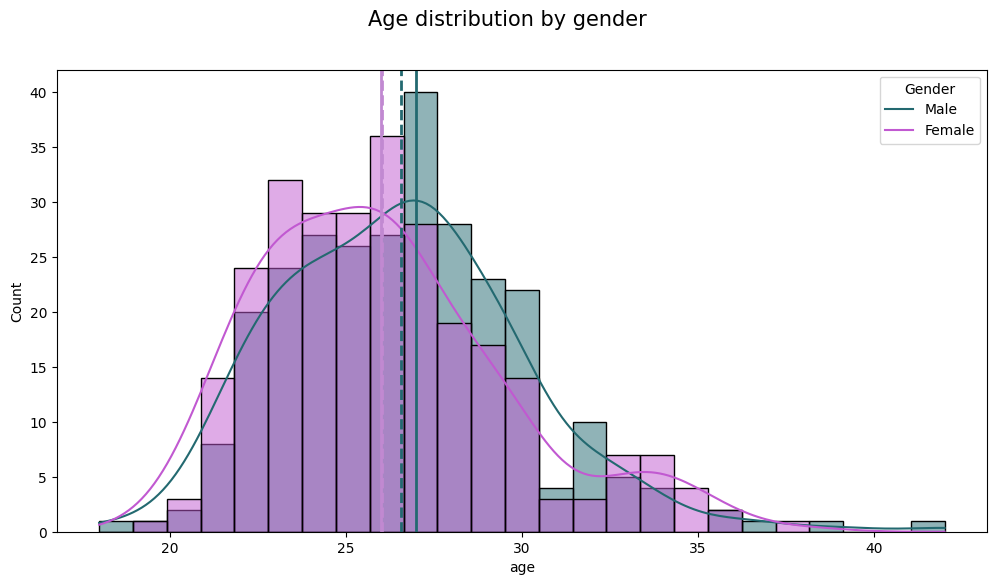

In [98]:
#drop the outlier
speed_dating_df.drop(speed_dating_df[speed_dating_df['age'] == 55].index, inplace=True)
df.drop(df[df['age'] == 55].index, inplace=True)

plt.figure(figsize=(12,6))
#make histogram of age distribution with distribution line drawn and hue separated by gender
sns.histplot(data=speed_dating_df, x='age', hue='gender', kde=True, palette=[ '#C159D1', '#236970'])

plt.suptitle('Age distribution by gender', fontsize=15)
legend = plt.legend(['Male', 'Female'])
legend.set_title('Gender')
plt.axvline(x=speed_dating_df[speed_dating_df['gender'] == 'Female']['age'].mean(),
            color='#C189D1', linestyle='--', label='mean', linewidth=2)
plt.axvline(x=speed_dating_df[speed_dating_df['gender'] == 'Female']['age'].median(),
            color='#C189D1', linestyle='-', label='mean', linewidth=2)
plt.axvline(x=speed_dating_df[speed_dating_df['gender'] == 'Male']['age'].mean(),
            color='#236970', linestyle='--', label='mean', linewidth=2)
plt.axvline(x=speed_dating_df[speed_dating_df['gender'] == 'Male']['age'].median(),
            color='#236970', linestyle='-', label='mean', linewidth=2)
plt.show()

In young adults (aged 20 to 27) and middle-aged adults (34-37), there is a higher proportion of female participants than males. However, a higher proportion of male participants is shown in the age range 27-33.

In [99]:
speed_dating_df['race'] = speed_dating_df.race.map({1: 'African', 2: 'Caucasian', 3: 'Hispanic', 
                          4: 'Asian',5: 'NativeAmer', 6: 'Other'}).fillna(speed_dating_df.race)
speed_dating_df['race_o'] = speed_dating_df.race.map({1: 'African', 2: 'Caucasian', 3: 'Hispanic', 
                          4: 'Asian',5: 'NativeAmer', 6: 'Other'}).fillna(speed_dating_df.race)
df['race'] = df.race.map({1: 'African', 2: 'Caucasian', 3: 'Hispanic', 
                          4: 'Asian', 5: 'NativeAmer', 6: 'Other'}).fillna(df.race)
df['race_o'] = df.race_o.map({1: 'African', 2: 'Caucasian', 3: 'Hispanic', 
                          4: 'Asian', 5: 'NativeAmer', 6: 'Other'}).fillna(df.race_o)
speed_dating_df.race.value_counts(dropna=False)

Caucasian    304
Asian        135
Hispanic      42
Other         37
African       26
NaN            6
Name: race, dtype: int64

In [100]:
speed_dating_df["gender"] = speed_dating_df["gender"].replace({0:"Female", 1:"Male"})
speed_dating_df["imprace"] = speed_dating_df["imprace"].replace({0:1.0})

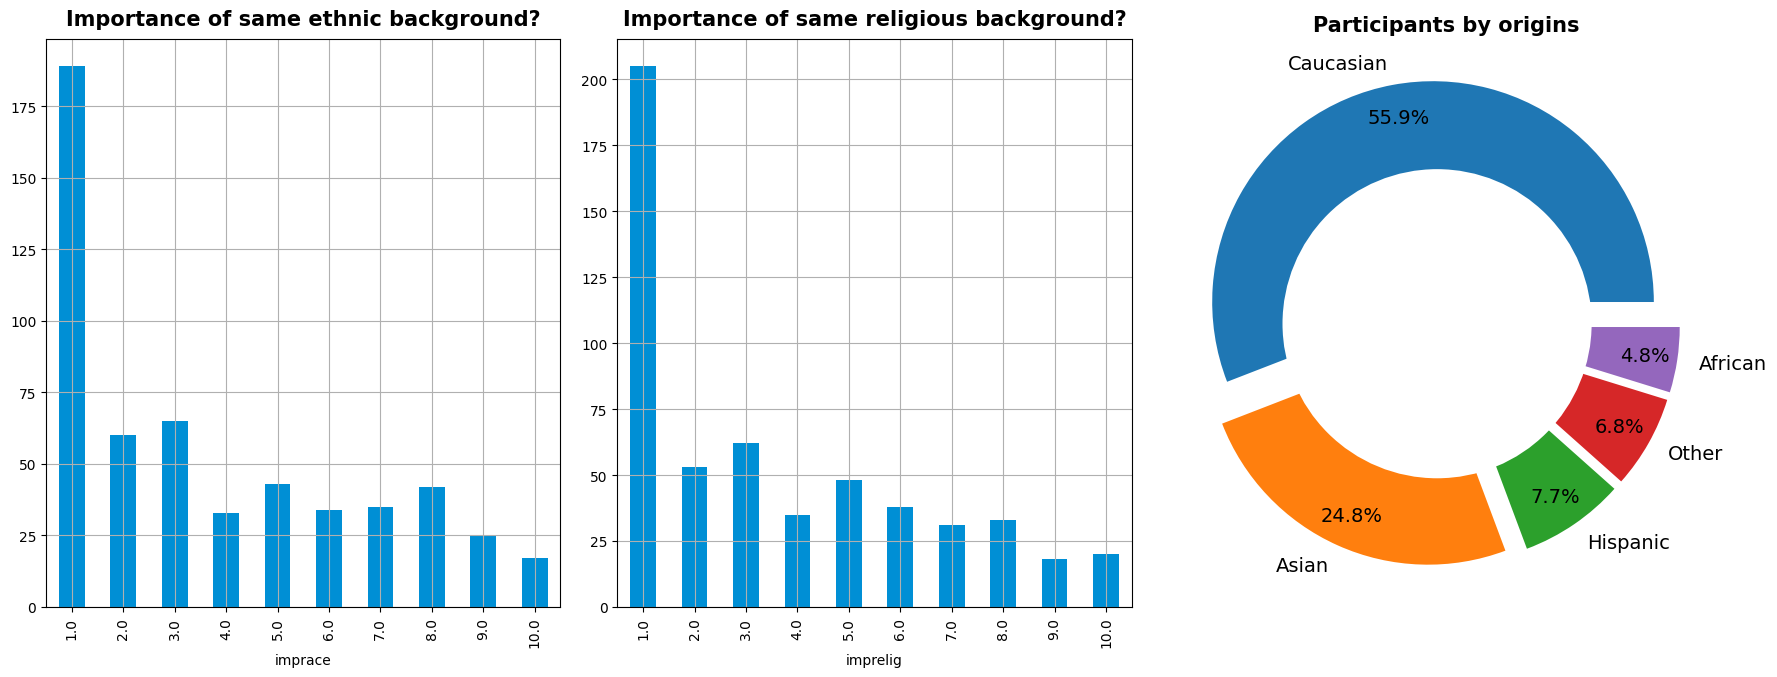

In [101]:
# make a grid of plots for imprace by count of subjects, same for imprelig
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
plt.style.use('fivethirtyeight') 
speed_dating_df.groupby("imprace").size().plot(kind="bar", ax=ax[0])
speed_dating_df.groupby("imprelig").size().plot(kind="bar", ax=ax[1])
ax[0].set_title("Importance of same ethnic background?", fontsize=15, pad=10, fontweight='bold')
ax[1].set_title("Importance of same religious background?", fontsize=15, pad=10, fontweight='bold')

# Plot
races = list((speed_dating_df['race'].value_counts() *100 / speed_dating_df.shape[0]).index)
races_perc = list((speed_dating_df['race'].value_counts() *100 / speed_dating_df.shape[0]).values)

explode = (0.1,0.1,0.1,0.1,0.1)

plt.pie(races_perc, labels=races, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Participants by origins", fontsize=15, fontweight='bold')


plt.axis('equal')
plt.tight_layout()
plt.show()

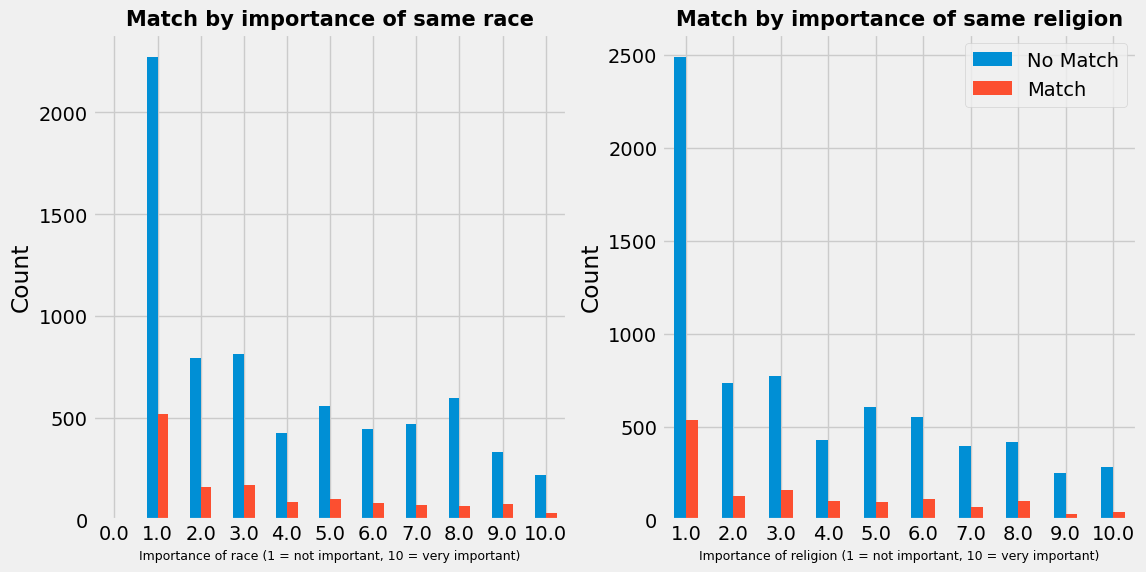

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
plt.style.use('fivethirtyeight') 

#count occurences of match by imprace
match_imprace = df.groupby(['imprace', 'match']).size().unstack()
match_imprace.plot(kind='bar', figsize=(15,6), ax=ax[0])
ax[0].set_title("Match by importance of same race", fontsize=15, fontweight='bold')
ax[0].set_xlabel('Importance of race (1 = not important, 10 = very important)', fontsize=9)
ax[0].set_ylabel('Count')
#hide legend from ax[0]
ax[0].legend().set_visible(False)
#rotate xticks
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")

#count occurences of match by imprelig
match_imprelig = df.groupby(['imprelig', 'match']).size().unstack()
match_imprelig.plot(kind='bar', figsize=(12,6), ax=ax[1])
plt.title("Match by importance of same religion", fontsize=15, fontweight='bold')
plt.legend(['No Match', 'Match'])
plt.xlabel('Importance of religion (1 = not important, 10 = very important)', fontsize=9)
plt.ylabel('Count')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
plt.show()


Not surprinsingly, the more we attach importance to these two questions the less matches we get ! Some food for thought maybe ...

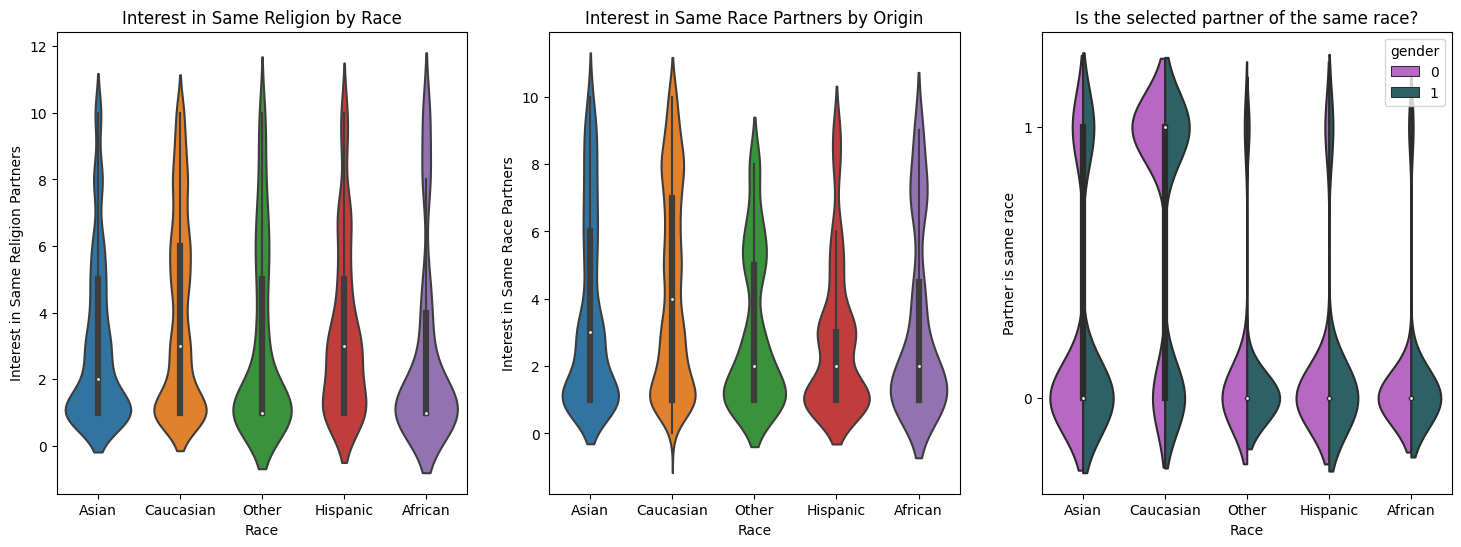

In [45]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

race = df['race']
same_relig_interest = df['imprelig']
same_race_interest = df['imprace']

race1 = df[df['dec']==1]['race']
same_race_interest1 = df[df['dec']==1]['samerace']

sns.violinplot(x=race, y=same_relig_interest, ax=ax1)
ax1.set_xlabel('Race')
ax1.set_ylabel('Interest in Same Religion Partners')
ax1.set_title('Interest in Same Religion by Race')

sns.violinplot(x=race, y=same_race_interest, ax=ax2)
ax2.set_xlabel('Race')
ax2.set_ylabel('Interest in Same Race Partners')
ax2.set_title("Interest in Same Race Partners by Origin")


# create the violin plot
sns.violinplot(x=race1, y=same_race_interest1, data=df[df['dec']==1], hue='gender', split=True, ax=ax3, palette=['#C159D1', '#236970'])
ax3.set_xlabel('Race')
ax3.set_ylabel('Partner is same race')
#set y scale to show integer values
ax3.set_yticks([0,1])
#set legend to male and female
ax3.set_title('Is the selected partner of the same race?')
plt.show()

We can see that overall, participants don't care that much about these criterias. However it is interesting to note that : 
- Caucasians and Asians are the participants that seem to care the most about having same ethnic and religious background (as the weighted violin plots suggest)
- Caucasian women seem to care the most about it, and it is equally represented among Asian participants  

We only have data on wether the partner of a match is of the same race, it would have been nice to have the same for religion !

---

### Goals and Habits.
In this subsection, we will see what the participants declared to be their intentions to be and what they usually do in terms of going out and dating.

In [103]:
speed_dating_df['goal'] = speed_dating_df.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'Ididit', 6:'Other'}).fillna(speed_dating_df.goal)
speed_dating_df['date'] = speed_dating_df.date.map({1.0: 'Several x/week', 2: 'Twice x/week', 3: 'Once x/week', 
                          4: 'Twice /Month', 5: 'Once /Month', 6:'Several x per year', 7.0:'Almost Never'}).fillna(speed_dating_df.date)
speed_dating_df['go_out'] = speed_dating_df.go_out.map({1: 'Several x/week', 2: 'Twice x/week', 3: 'Once x/week', 
                          4: 'Twice /Month', 5: 'Once /Month', 6:'Several x per year', 7:'Almost Never'}).fillna(speed_dating_df.go_out)

In [104]:
goals = speed_dating_df['goal'].value_counts()*100 / speed_dating_df.shape[0]
date = speed_dating_df['date'].value_counts()*100 / speed_dating_df.shape[0]
go_out = speed_dating_df['go_out'].value_counts()*100 / speed_dating_df.shape[0]

In [105]:
speed_dating_df["gender"] = speed_dating_df["gender"].replace({0:"Female", 1:"Male"})


--------------------------------------------
Answers to the goal question:
Fun             228
Meet            189
Date             40
Ididit           35
Other            29
Relationship     22
Name: goal, dtype: int64
--------------------------------------------
Answers to the date question:
Several x per year    136
Twice /Month          131
Once /Month            99
Almost Never           93
Once x/week            54
Twice x/week           22
Several x/week          7
Name: date, dtype: int64
--------------------------------------------
Answers to the go_out question:
Twice x/week          191
Several x/week        177
Once x/week           126
Twice /Month           29
Once /Month            12
Several x per year      6
Almost Never            2
Name: go_out, dtype: int64


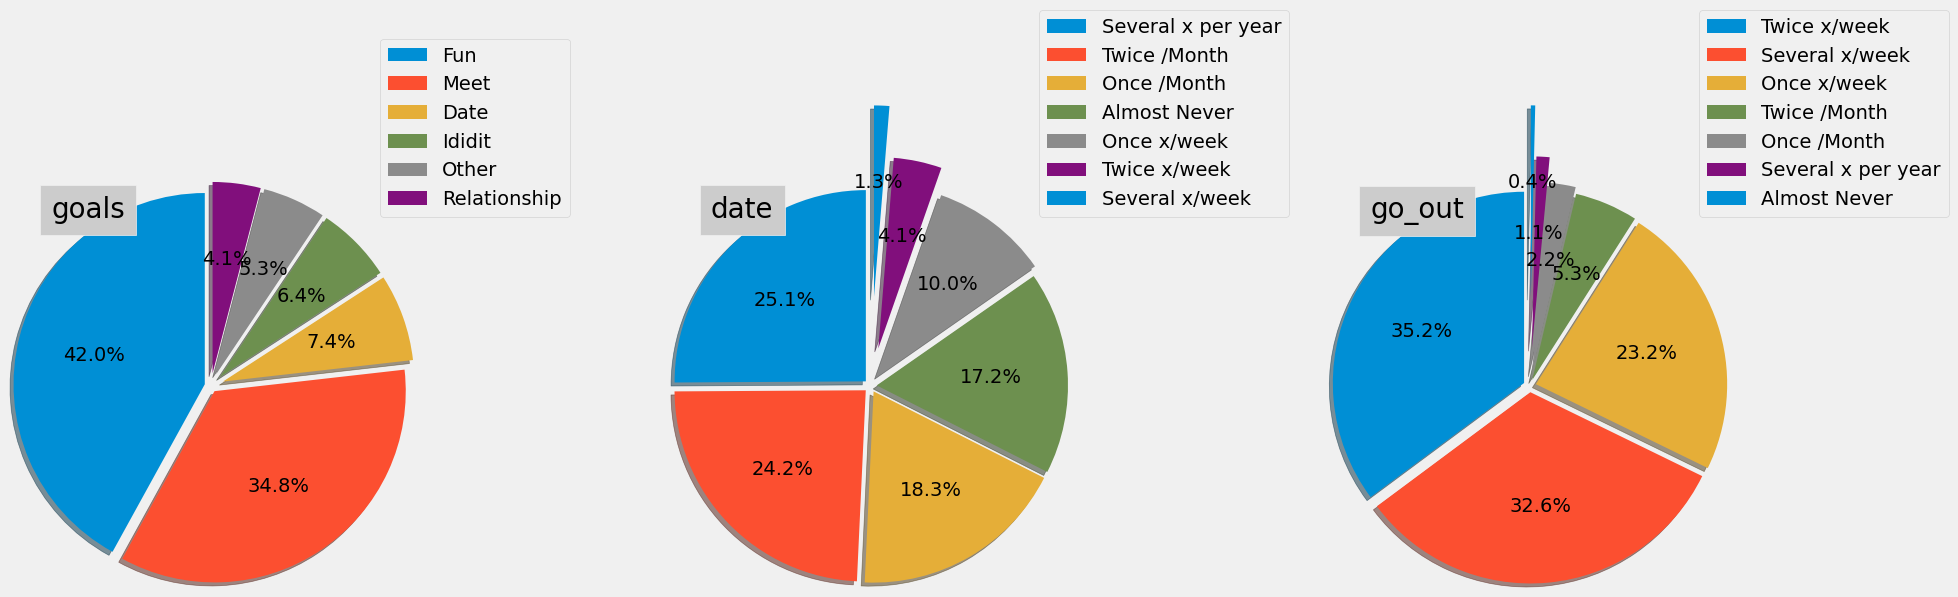

In [106]:
fig, ax = plt.subplots(1,3, figsize=(20,16))

ax[0].pie(goals,
        explode = [0.05,0.05,0.1,0.1,0.1,0.1],
        autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.5)
ax[0].legend(goals.index, bbox_to_anchor=(1,1))
ax[0].set_title('goals', loc='left', fontsize=20,bbox={'facecolor':'0.8', 'pad':8})

ax[1].pie(date,
        autopct='%1.1f%%',
        explode = [0.05,0.05,0.05,0.05,0.1,0.3,0.7],
       shadow=True,
       startangle=90,
       radius=1.5)

ax[1].legend(date.index, bbox_to_anchor=(1,1))
ax[1].set_title('date', loc='left', fontsize=20,bbox={'facecolor':'0.8', 'pad':8})

ax[2].pie(go_out,
        autopct='%1.1f%%',
        explode = [0.05,0.05,0.05,0.05,0.1,0.3,0.7],
       shadow=True,
       startangle=90,
       radius=1.5)
ax[2].legend(go_out.index, bbox_to_anchor=(1,1))
ax[2].set_title('go_out', loc='left', fontsize=20,bbox={'facecolor':'0.8', 'pad':8})

fig.tight_layout()

print('--------------------------------------------')
print('Answers to the goal question:')
print(speed_dating_df['goal'].value_counts())
print('--------------------------------------------')
print('Answers to the date question:')
print(speed_dating_df['date'].value_counts())
print('--------------------------------------------')
print('Answers to the go_out question:')
print(speed_dating_df['go_out'].value_counts())

- Most of the participants declare being there at this event to have fun (42.0 %) or Meet someone new (34.8 %).
- Most of the participants declare going out Twice per week (35.2%) or Several times per Week (32.6 %).
- Most of the participants declare going out specifically for dates Several time per Year (25.1%) or Twice a month (24.2 %)

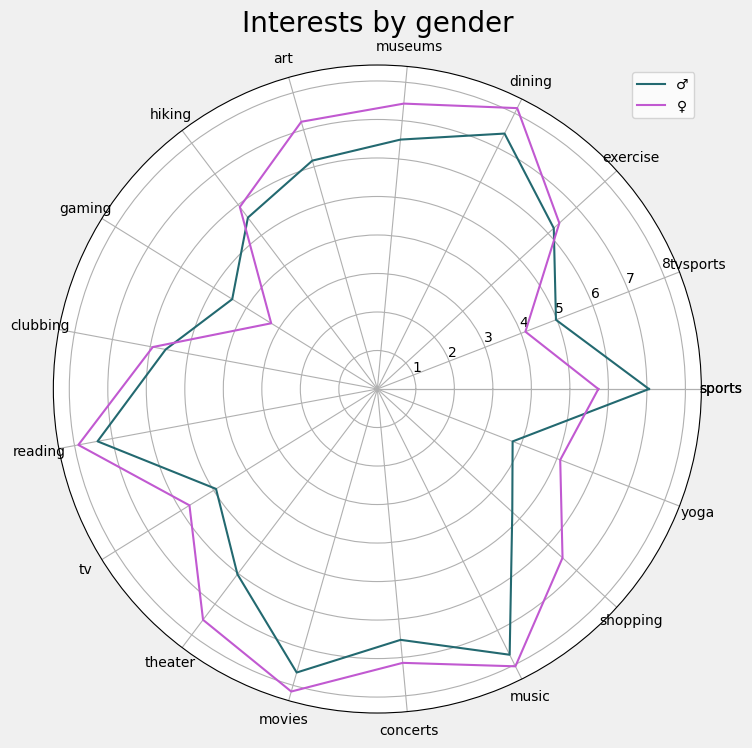

In [107]:
interests = list(speed_dating_df.loc[:,"sports":"yoga"].columns)

men_interests = []
for x in interests:
    men_interests.append(speed_dating_df[speed_dating_df['gender']=="Male"][x].mean())

women_interests = []
for x in interests:
    women_interests.append(speed_dating_df[speed_dating_df['gender']=="Female"][x].mean())
    
label_pos = np.linspace(start=0, stop=2 * np.pi, num=len(men_interests), endpoint=False)
label_pos = np.concatenate((label_pos, [label_pos[0]]))

interests.append(interests[0])
men_interests.append(men_interests[0])
women_interests.append(women_interests[0])

plt.figure(figsize=(8,8))
plt.style.use('default')
plt.subplot(polar=True)
plt.plot(label_pos, men_interests, label='♂', color='#236970')
plt.plot(label_pos, women_interests, label='♀', color='#C159D1')
plt.title('Interests by gender', size=20)
lines, labels = plt.thetagrids(np.degrees(label_pos), labels=interests)
plt.legend()
plt.show()

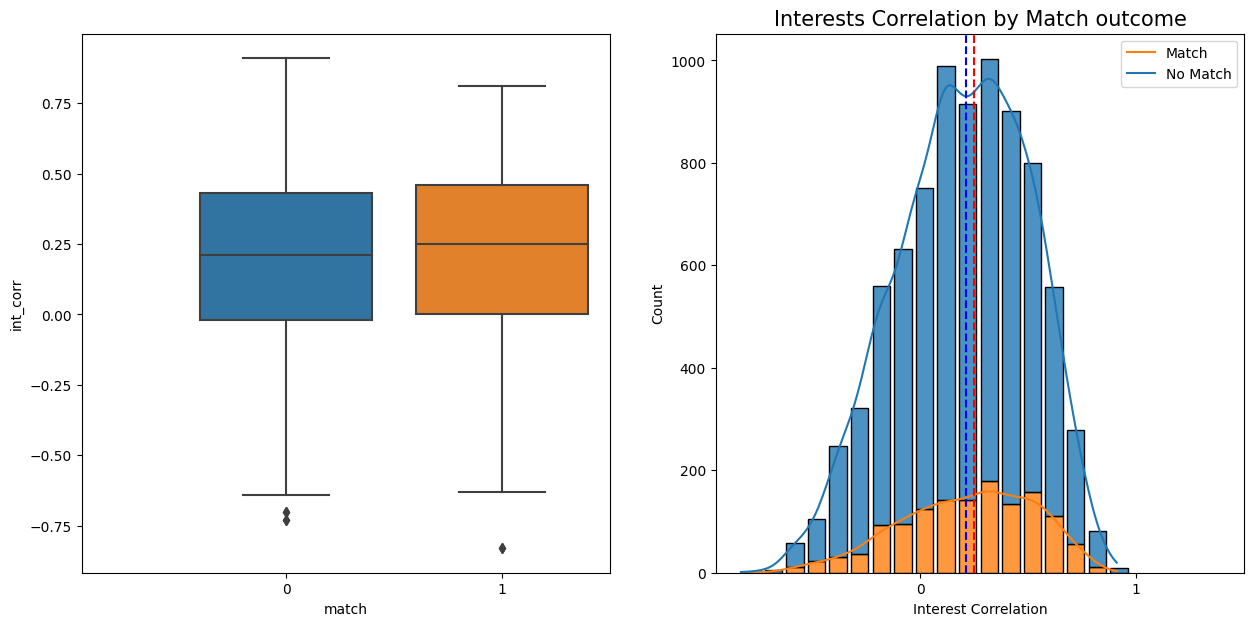

In [114]:
#plot violin plot of int_corr by match
f, (ax_box, ax_hist) = plt.subplots(1, ncols=2, sharex=True, figsize=(15, 7))
plt.title('Interests Correlation by Match outcome', fontsize=15)
sns.boxplot(x='match', y='int_corr', data=df, ax=ax_box)
sns.histplot(data=df, x="int_corr", ax=ax_hist, hue='match',  kde=True, alpha=0.8, shrink=0.8, binwidth=0.1, multiple="stack")
ax_hist.set(xlabel='Interest Correlation', ylabel='Count')
#add vertical line to show mean
ax_hist.axvline(df[df["match"] == 1]['int_corr'].median(), color='r', linestyle='--')
ax_hist.axvline(df[df["match"] == 0]['int_corr'].median(), color='b', linestyle='--')
#add legend
ax_hist.legend(['Match', 'No Match'])
plt.show()

These charts seem to indicate that a **good date** that is likely to be enjoyed by both genders involves _**movies**_ or _**dining**_ even _**music**_, since the distributions depending on gender overlap quite well regarding those interests.
However, if we refer back to the heatmap, we can see that **none of the interests really correlate with the match outcome**! Let's take note that there is a slight increase in interests correlation when the outcome is a match, which seems to **indicate that shared interests may be a factor in the match outcome !** However the increase is not statistically significant, in reality we do not have to have exactly the same interests and hobbies to match with someone, and thank god for that ! 

---

## Attributes that participants look for in their partners

In [115]:
print(df.income.dtype)

df['income'] = df['income'].replace({'\$':'',',':''}, regex = True)
df['income'] = df['income'].astype(float)

object


In [116]:
#replace salaries by intervals of 10000$ up to max salary in df
df['income'] = pd.cut(df['income'], bins=np.linspace(0, 100000, 11), labels=['0-$10000', '$10000-$20000', '$20000-$30000', '$30000-$40000', '$40000-$50000', '$50000-$60000', '$60000-$70000', '$70000-$80000', '$80000-$90000', '$90000-$100000'])

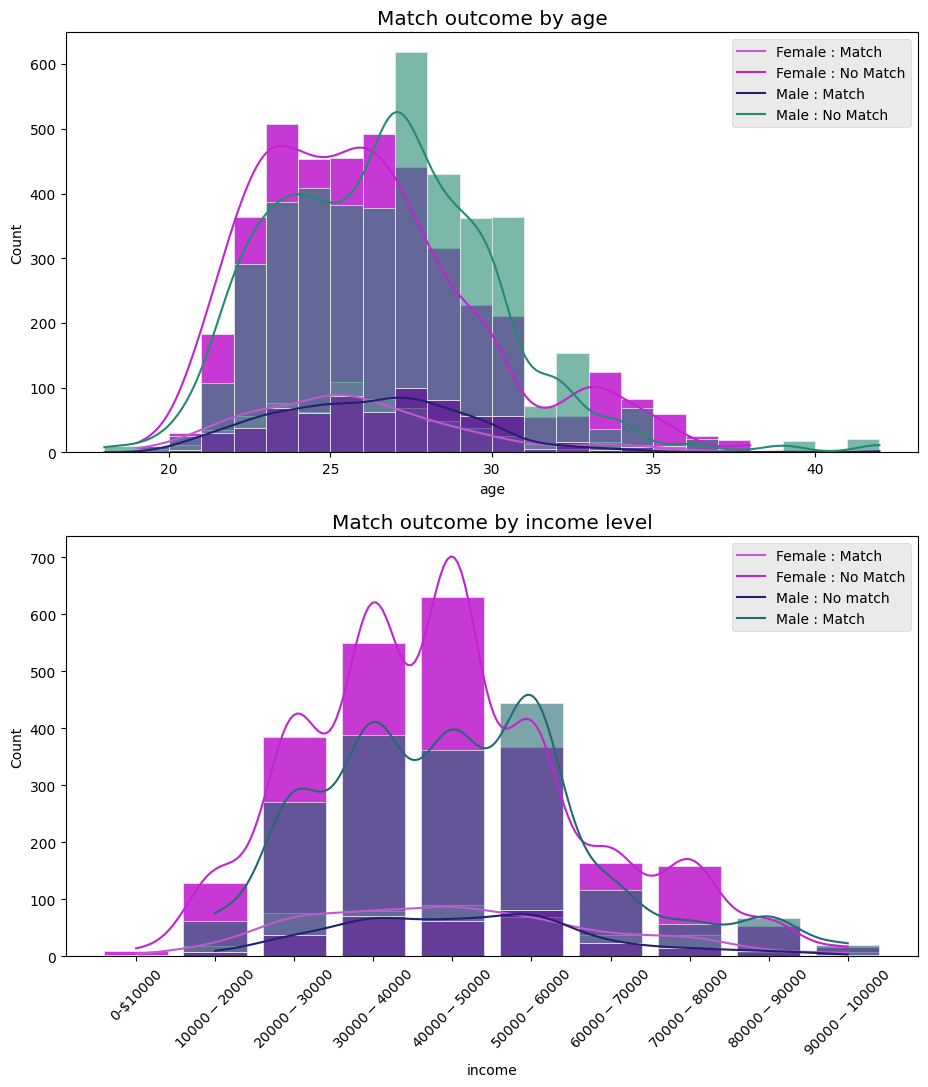

In [117]:
fig, ax = plt.subplots(2, 1)
plt.style.use('ggplot')

#plot match outcome for male gender by income level separating xtiicks by 10000$ intervals on two subplots
fig.set_size_inches(11, 12)
sns.histplot(x='age', hue='match', data=df[df['gender'] == 0], binwidth=1, kde=True, palette=['#C123D1', '#C159D1'], alpha=0.9, ax= ax[0], multiple="stack")
sns.histplot(x='age', hue='match', data=df[df['gender'] == 1], binwidth=1, kde=True, palette=['#238970', '#232070'], alpha=0.6, ax= ax[0], multiple="stack")

sns.histplot(x='income', hue='match', data=df[df['gender'] == 0], binwidth=1, kde=True, palette=['#C123D1', '#C159D1'], alpha=0.9, ax= ax[1], multiple="stack", shrink=0.8)
sns.histplot(x='income', hue='match', data=df[df['gender'] == 1], binwidth=1, kde=True, palette=['#236970', '#232070'], alpha=0.6, ax= ax[1], multiple="stack", shrink=0.8)
#add legend 
ax[0].legend(['Female : Match', 'Female : No Match', 'Male : Match', 'Male : No Match'])
ax[1].legend(['Female : Match', 'Female : No Match', 'Male : No match', 'Male : Match'])
#add kdeplot

plt.xticks(rotation=45)
ax[0].set_title('Match outcome by age')
ax[1].set_title('Match outcome by income level')
plt.show()

In [119]:
df_men = df[df['gender'] == 1]
df_women = df[df['gender'] == 0]
df_match = df[df['match'] == 1]
df_no_match = df[df['match'] == 0]

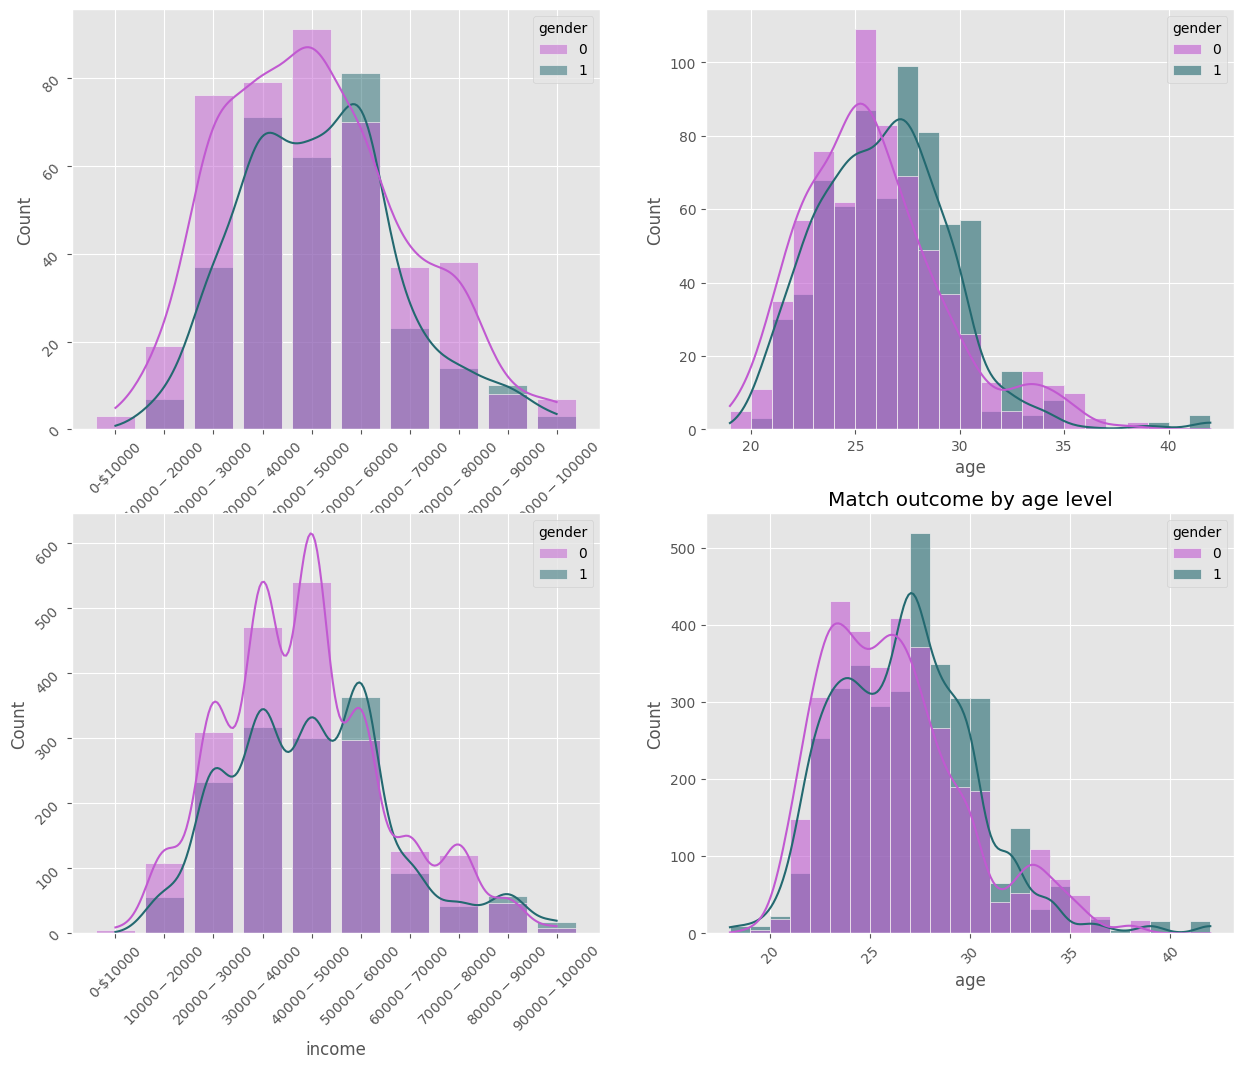

In [120]:
fig, ax = plt.subplots(2, 2)
#plot match outcome for male gender by income level separating xtiicks by 10000$ intervals
fig.set_size_inches(16, 12)
sns.histplot(x='income', hue='gender', data=df_match, palette=['#C159D1','#236970'], kde=True,  alpha=0.5, shrink=0.8, ax= ax[0,0])
ax[0,0].tick_params(labelrotation=45)
fig.set_size_inches(15, 12)
sns.histplot(x='income', hue='gender', data=df_no_match, palette=['#C159D1','#236970'], kde=True, alpha=0.5, shrink=0.8, ax = ax[1,0])
ax[1,0].tick_params(labelrotation=45)

#add legend
# ax[1].legend(['Female : No match', 'Female : Match', 'Male : No match', 'Male : Match'])
# plt.xticks(rotation=45)
# plt.title('Match outcome by income level')

# sns.histplot(x='age', hue='match', data=df_match[df_match['gender'] == 0], binwidth=1, kde=True, alpha=0.9, ax = ax[1,1])
sns.histplot(x='age', hue='gender', data=df_match, palette=['#C159D1','#236970'], binwidth=1, kde=True, alpha=0.6, ax= ax[0,1])
sns.histplot(x='age', hue='gender', data=df_no_match, palette=['#C159D1','#236970'], binwidth=1, kde=True, alpha=0.6, ax = ax[1,1])
# sns.histplot(x='age', hue='match', data=df_no_match[df_no_match['gender'] == 1], binwidth=1, kde=True, alpha=0.4, ax= ax[0,1])
# #add legend 
#add kdeplot

plt.xticks(rotation=45)
plt.title('Match outcome by age level')
plt.show()
#center output figures



---

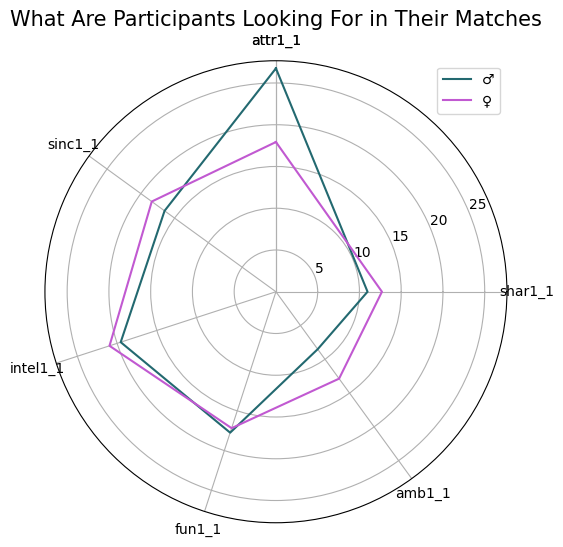

In [168]:
interests = list(df.loc[:,"attr1_1":"shar1_1"].columns)

men_interests = []
for x in interests:
    men_interests.append(df[df['gender']==1][x].mean())

women_interests = []
for x in interests:
    women_interests.append(df[df['gender']==0][x].mean())
    
label_pos = np.linspace(start=np.pi / 2, stop=2 * np.pi, num=len(men_interests), endpoint=True)
label_pos = np.concatenate((label_pos, [label_pos[0]]))

interests.append(interests[0])
men_interests.append(men_interests[0])
women_interests.append(women_interests[0])

plt.figure(figsize=(6,6))
plt.style.use('default')
plt.subplot(polar=True)
plt.plot(label_pos, men_interests, label='♂', color='#236970')
plt.plot(label_pos, women_interests, label='♀', color='#C159D1')
plt.title('What Are Participants Looking For in Their Matches', size=15)
lines, labels = plt.thetagrids(np.degrees(label_pos), labels=interests)
plt.legend()
plt.show()

We can see that there is a great difference between what male and female participants are looking for.

* For male participants, the attractiveness of the female is given a lot more weight, and the ambitiousness or if they have any shared interset are ranked not as high.

* For females, the points are more evenly distributed across all of the attributes, with intelligence ranked slightly higher compared to others.

Men are looking for attractive women, and are less concerned with a woman’s abmition and shared interests. On the other hand, women are looking for a well-rounded male and value intelligence in a man.

---

Let's build some functions to help us collect data for the coming visualizations :

In [ ]:
def find_columns(data, search_term):
    '''function to find columns with a search term'''''
    features_cols = [col for col in data.columns if search_term in col]
    return features_cols


def collect_features_means(data, features_cols):
    '''function to collect features' means from a list of columns'''  
    men_features = []
    for x in features_cols:
        men_features.append(data[data['gender'] == 1][x].mean())
    
    women_features = []
    for x in features_cols:
        women_features.append(data[data['gender'] == 0][x].mean())
    print(men_features)
    print(women_features)
    
    return [men_features, women_features]

def get_label_pos(data, men_features):
    '''function to get label positions for a polar plot'''
    label_pos = np.linspace(start=np.pi / 4, stop=2 * np.pi, num=len(men_features), endpoint=True)
    label_pos = np.concatenate((label_pos, [label_pos[0]]))

    return label_pos

In [ ]:
features4_1 = find_columns(df,'4_1')
men_features4_1, women_features4_1 = collect_features_means(df4_1, features4_1)

label_pos4_1 = np.linspace(start=np.pi / 2, stop=2*np.pi + np.pi/4 , num=len(men_features4_1), endpoint=False)
label_pos4_1 = np.concatenate((label_pos4_1, [label_pos4_1[0]]))

features4_1.append(features4_1[0])
men_features4_1.append(men_features4_1[0])
women_features4_1.append(women_features4_1[0])

print(features4_1)
print("-"*100)

features2_1 = find_columns(df,'2_1')
men_features2_1, women_features2_1 = collect_features_means(df2_1, features2_1)

label_pos2_1 = np.linspace(start=np.pi / 2, stop=2*np.pi + np.pi/4 , num=len(men_features2_1), endpoint=False)
label_pos2_1 = np.concatenate((label_pos2_1, [label_pos2_1[0]]))

features2_1.append(features2_1[0])
men_features2_1.append(men_features2_1[0])
women_features2_1.append(women_features2_1[0])

print(features2_1)

[28.075785582255083, 10.774183610597659, 12.163894023413432, 16.204251386321626, 7.690080098582871, 10.871534195933457]
[24.711378353376503, 11.369102682701202, 13.109158186864015, 14.92876965772433, 11.872032069071848, 11.159267308289351]
['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr4_1']
----------------------------------------------------------------------------------------------------
[25.092630570196455, 15.18107810253953, 16.27963344513656, 18.115378533780547, 14.234815081652258, 11.07192363112392]
[35.69434909090909, 11.34364606060606, 12.532021818181818, 18.7335103030303, 9.230637575757575, 12.645112727272727]
['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr2_1']


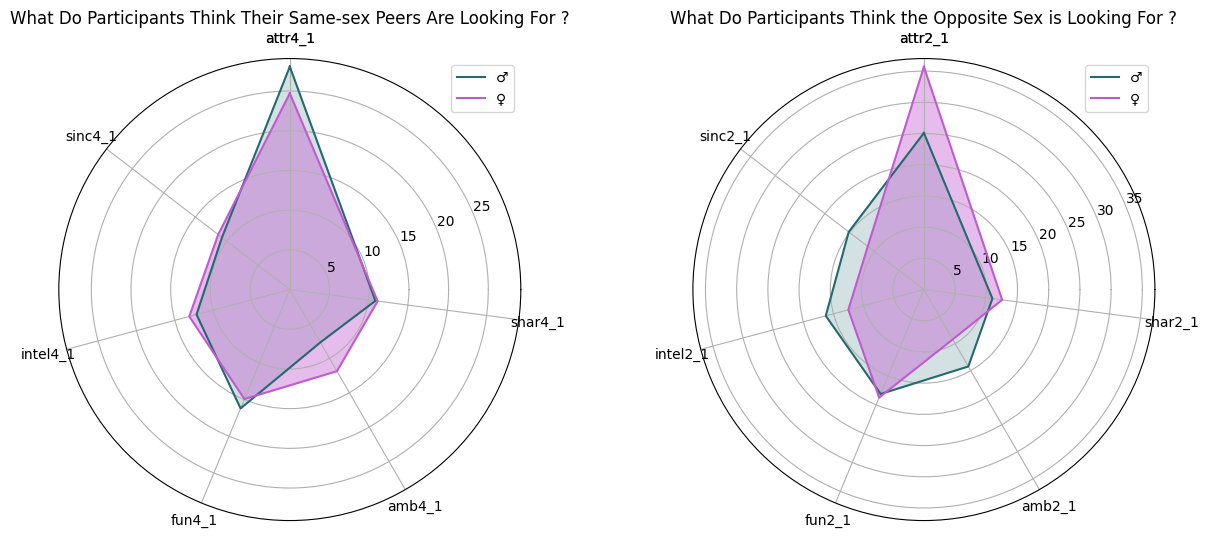

In [205]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
gs = gridspec.GridSpec(1, 2)


ax[0].axis('off')
ax[0]= fig.add_subplot(gs[0,0], projection='polar')
ax[0].set_xticklabels([])
ax[0].plot(label_pos4_1, men_features4_1, label='♂', color='#236970')
ax[0].fill(label_pos4_1, men_features4_1, '#236970', alpha = 0.2)
ax[0].plot(label_pos4_1, women_features4_1, label='♀', color='#C159D1')
ax[0].fill(label_pos4_1, women_features4_1, '#C159D1', alpha = 0.4)
ax[0].set_title('What Do Participants Think Their Same-sex Peers Are Looking For ?', size=12)
lines, labels = plt.thetagrids(np.degrees(label_pos4_1), labels=features4_1)
plt.legend(bbox_to_anchor=(1,1))


ax[1].axis('off')
ax[1]= fig.add_subplot(gs[0,1], polar=True)
ax[1].plot(label_pos2_1, men_features2_1, label='♂', color='#236970')
ax[1].fill(label_pos2_1, men_features2_1, '#236970', alpha = 0.2)
ax[1].plot(label_pos2_1, women_features2_1, label='♀', color='#C159D1')
ax[1].fill(label_pos2_1, women_features2_1, '#C159D1', alpha = 0.4)
ax[1].set_title('What Do Participants Think the Opposite Sex is Looking For ?', size=12)
lines, labels = plt.thetagrids(np.degrees(label_pos2_1), labels=features2_1)

plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [190]:
ratings_given = list(df.loc[:,"attr":"shar"].columns)

men_ratings_given = []
for x in ratings_given:
    men_ratings_given.append(df[(df['gender']==1) & (df['dec'] == 1)][x].mean())

women_ratings_given = []
for x in ratings_given:
    women_ratings_given.append(df[(df['gender']==0) & (df['dec'] == 1)][x].mean())
    
label_pos_giv = np.linspace(start=0, stop=2 * np.pi, num=len(men_ratings_given), endpoint=False)
label_pos_giv = np.concatenate((label_pos_giv, [label_pos_giv[0]]))

ratings_given.append(ratings_given[0])
men_ratings_given.append(men_ratings_given[0])
women_ratings_given.append(women_ratings_given[0])



ratings_received = list(df.loc[:,"attr_o":"shar_o"].columns)

men_ratings_received = []
for x in ratings_received:
    men_ratings_received.append(df[(df['gender']==1) & (df['dec_o'] == 1)][x].mean())

women_ratings_received = []
for x in ratings_received:
    women_ratings_received.append(df[(df['gender']==0) & (df['dec_o'] == 1)][x].mean())
    
label_pos_received = np.linspace(start=0, stop=2 * np.pi, num=len(men_ratings_received), endpoint=False)
label_pos_received = np.concatenate((label_pos_received, [label_pos_received[0]]))

ratings_received.append(ratings_received[0])
men_ratings_received.append(men_ratings_received[0])
women_ratings_received.append(women_ratings_received[0])

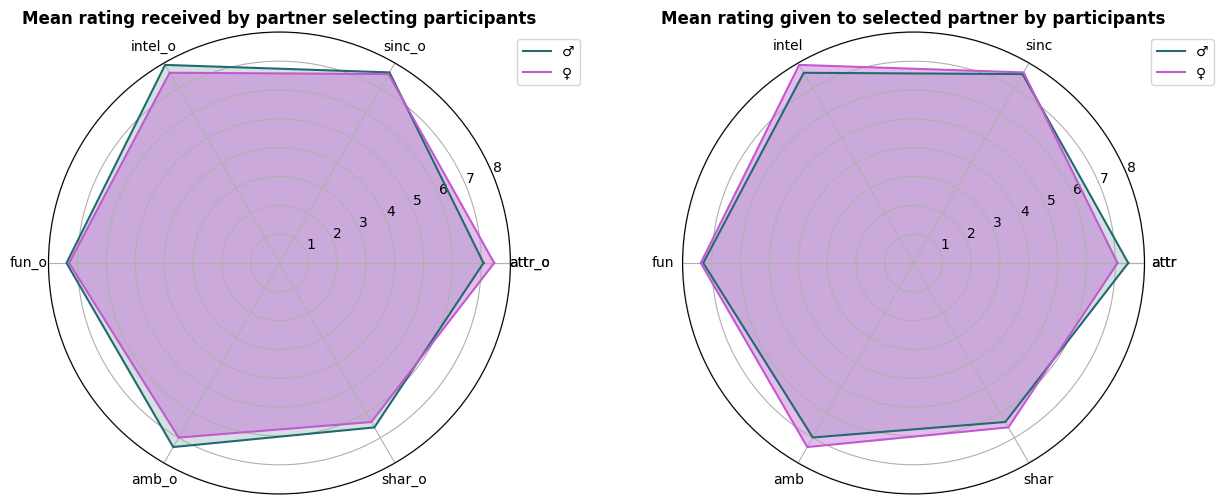

In [191]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
gs = gridspec.GridSpec(1, 2)


ax[0].axis('off')
ax[0]= fig.add_subplot(gs[0,0], projection='polar')
ax[0].set_xticklabels([])
ax[0].plot(label_pos_received, men_ratings_received, label='♂', color='#236970')
ax[0].fill(label_pos_received, men_ratings_received, '#236970', alpha = 0.2)
ax[0].plot(label_pos_received, women_ratings_received, label='♀', color='#C159D1')
ax[0].fill(label_pos_received, women_ratings_received, '#C159D1', alpha = 0.4)
ax[0].set_title('Mean rating received by partner selecting participants', size=12, fontweight='bold')
lines, labels = plt.thetagrids(np.degrees(label_pos_received), labels=ratings_received)
plt.legend(bbox_to_anchor=(1,1))


ax[1].axis('off')
ax[1]= fig.add_subplot(gs[0,1], polar=True)
ax[1].plot(label_pos_giv, men_ratings_given, label='♂', color='#236970')
ax[1].fill(label_pos_giv, men_ratings_given, '#236970', alpha = 0.2)
ax[1].plot(label_pos_giv, women_ratings_given, label='♀', color='#C159D1')
ax[1].fill(label_pos_giv, women_ratings_given, '#C159D1', alpha = 0.4)
ax[1].set_title('Mean rating given to selected partner by participants', size=12, fontweight='bold')
lines, labels = plt.thetagrids(np.degrees(label_pos_giv), labels=ratings_given)

plt.legend(bbox_to_anchor=(1,1))
plt.show()

---

In [ ]:
# unrequited love count
no_love_count = len(df[(df['dec_o']==0) & (df['dec']==1)]) 
+ len(df[(df['dec_o']==1) & (df['dec']==0)])
perc_broken_heart = no_love_count / len(df.index)
perc_broken_heart*100

25.90628853267571

Looks like approximately 26% of our participants have experienced 'unrequited love' or non-reciprocated selections ! Press 'F' to pay respects

In [223]:
# encoding unrequited love as a new column
df['url']=np.where(((df['dec_o']==0) & (df['dec']==1))|((df['dec']==0) & (df['dec_o']==1)),1,0)

Text(0.5, 0, 'Broken Heart')

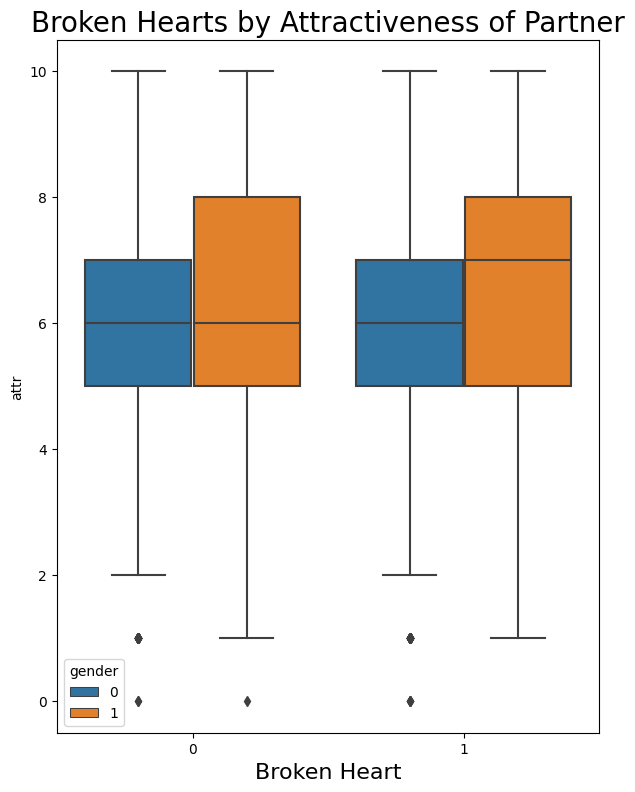

In [224]:
# looking at url by attractiveness
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr',hue='gender', order=[0,1], data=df)
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

The good news here is that your attractiveness won't affect your probability of being subjected to unrequited love !


Now let's narrow the Dataset :

In [123]:
date = df.copy()

In [235]:
date.isna().sum().sort_values(ascending=False).head(20)

income      4123
amb5_1      3472
attr5_1     3472
sinc5_1     3472
intel5_1    3472
fun5_1      3472
total5_1    3472
fun4_1      1911
amb4_1      1911
intel4_1    1911
sinc4_1     1911
attr4_1     1911
shar4_1     1911
total4_1    1911
match_es    1173
shar_o      1075
shar        1067
amb_o        721
amb          712
met_o        385
dtype: int64

In [226]:
dating_1m = df[df['gender']==1].loc[:, 'iid':'id']
dating_2m = df[df['gender']==1].loc[:, 'match':'age']
dating_3m = df[df['gender']==1].loc[:, 'imprace':'imprelig']
dating_4m = df[df['gender']==1].loc[:, 'dec':'met']

date_men = pd.concat([dating_1m,dating_2m,dating_3m,dating_4m,df[df['gender']==1].loc[:,'url']], axis=1)



dating_1w = df[df['gender']==0].loc[:, 'iid':'id']
dating_2w = df[df['gender']==0].loc[:, 'match':'age']
dating_3w = df[df['gender']==0].loc[:, 'imprace':'imprelig']
dating_4w = df[df['gender']==0].loc[:, 'dec':'met']

date_women = pd.concat([dating_1w,dating_2w,dating_3w,dating_4w,df[df['gender']==0].loc[:,'url']], axis=1)

date_women.head()
date_men.head()

,iid,id,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,imprace,imprelig,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,url
100,11,1.0,0,0.14,0,21.0,Asian,15.0,20.0,20.0,15.0,15.0,15.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,27.0,7.0,3.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,1
101,11,1.0,0,0.29,1,24.0,Caucasian,45.0,5.0,25.0,20.0,0.0,5.0,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,27.0,7.0,3.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,0
102,11,1.0,0,-0.24,1,25.0,Caucasian,35.0,10.0,35.0,10.0,10.0,0.0,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,27.0,7.0,3.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,0
103,11,1.0,0,-0.18,1,23.0,Caucasian,20.0,20.0,20.0,20.0,10.0,10.0,0,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0,2.0,27.0,7.0,3.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,0
104,11,1.0,0,-0.43,1,21.0,Caucasian,20.0,5.0,25.0,25.0,10.0,15.0,0,5.0,8.0,8.0,2.0,2.0,2.0,7.0,5.0,2.0,27.0,7.0,3.0,0,6.0,8.0,8.0,8.0,7.0,6.0,6.0,5.0,2.0,0


In [227]:
date_men.isna().sum().max()

474

In [228]:

# creating an object-free dataframe for later use
date_women_no_obj = date_women.select_dtypes(exclude=['object'])
date_men_no_obj = date_men.select_dtypes(exclude=['object'])

print("date_men_no_obj shape",date_men_no_obj.shape)
print("date_women_no_obj shape",date_women_no_obj.shape)

# dropping null values
date_women_no_obj = date_women.dropna()
date_men_no_obj = date_men.dropna()

date_men_no_obj shape (4058, 36)
date_women_no_obj shape (4052, 36)


In [229]:

date_men_missing_ratio = date_men_no_obj.isna().sum()*100 / date_men_no_obj.shape[0]
print("date_men_no_obj max value for NaN ratio :",date_men_missing_ratio.sort_values(ascending=False).max())
date_women_missing_ratio = date_women_no_obj.isna().sum()*100 / date_women_no_obj.shape[0]
print("date_women_no_obj max value for NaN ratio :",date_women_missing_ratio.sort_values(ascending=False).max())
print("date_men_no_obj shape",date_men_no_obj.shape)
print("date_women_no_obj shape",date_women_no_obj.shape)

date_men_no_obj max value for NaN ratio : 0.0
date_women_no_obj max value for NaN ratio : 0.0
date_men_no_obj shape (2740, 37)
date_women_no_obj shape (2747, 37)


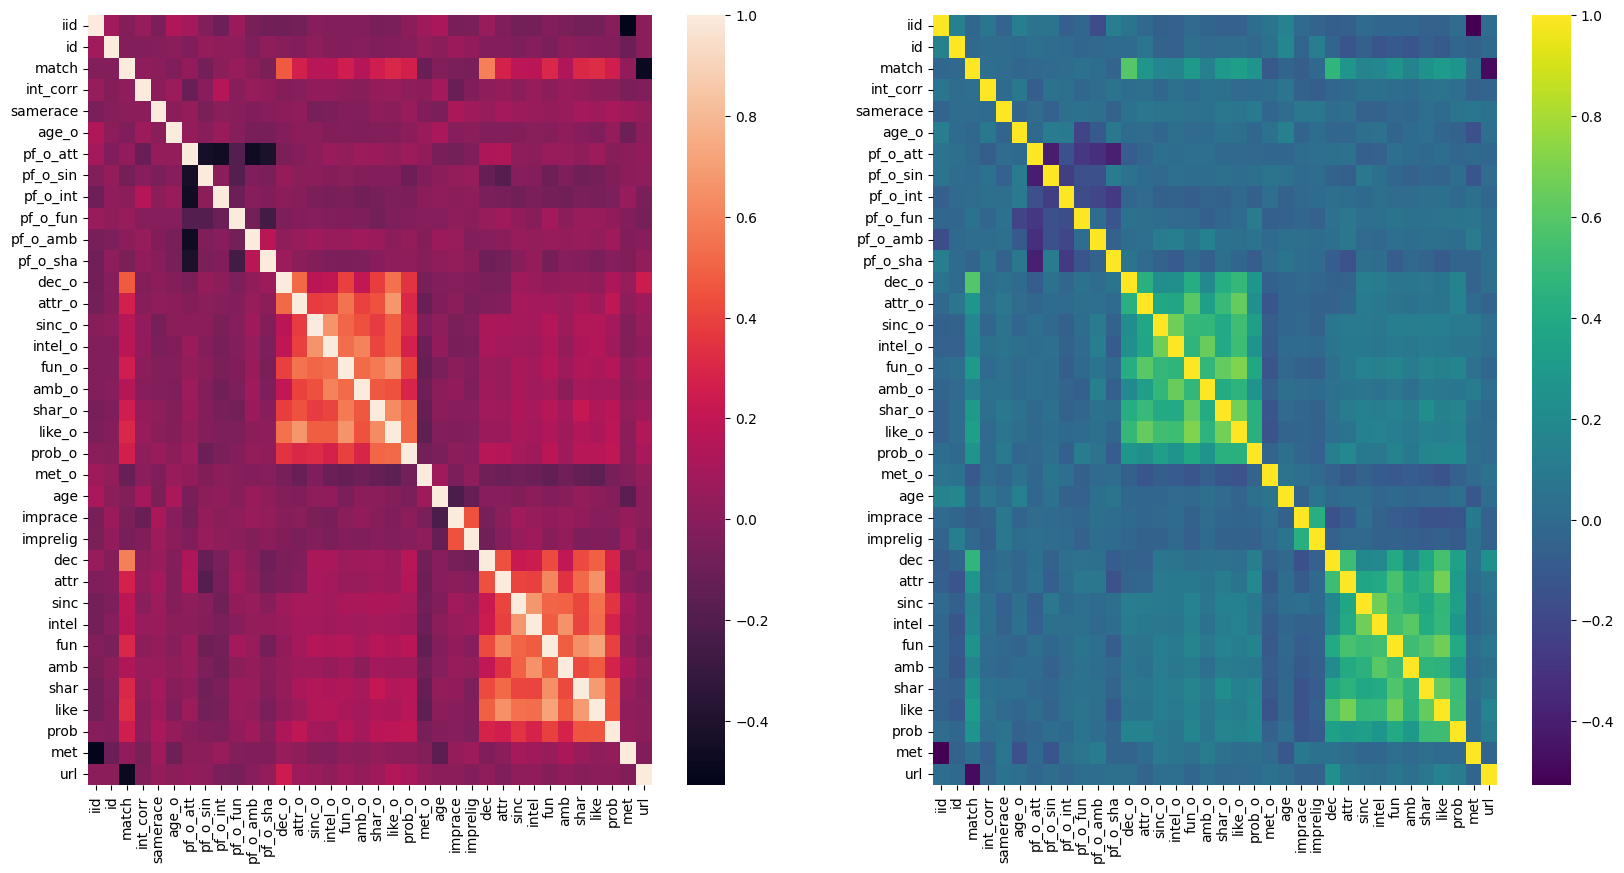

In [230]:
import warnings

#plot correlation matrix
corr_women = date_women_no_obj.corr()
corr_men = date_men_no_obj.corr()

#subplot 1 row 2 columns
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
sns.heatmap(corr_women, ax=ax[0], fmt=".2f")
sns.heatmap(corr_men, ax=ax[1], fmt=".2f", cmap='viridis')
plt.show()

warnings.filterwarnings('ignore')


In [231]:
corr_men.loc[:, ['match']].sort_values('match').tail(10)

,match
prob,0.262004
attr,0.267348
attr_o,0.272549
shar_o,0.298669
fun_o,0.300445
like,0.302812
like_o,0.325180
dec,0.470929
dec_o,0.588819
match,1.000000


In [232]:
corr_women.loc[:, ['match']].sort_values('match').tail(10)

,match
prob_o,0.262077
attr_o,0.267104
attr,0.274218
like_o,0.301170
fun,0.302066
shar,0.302263
like,0.325330
dec_o,0.469763
dec,0.590660
match,1.000000


Some interesting observations can be made when considering the heatmap above.

* For *men*, it seems that their partners decision (dec_o) to select them is more correlated with their match outcome than their decision to select the said partner (dec)
    - attributes that are playing a major role in a **Man**'s match outcome are : if he is perceived by the woman as likeable, funny, attractive and share some interests with the match also if he thinks his match is likeable and attractive.
* For *women*, it seems that their own decision (dec) to select their partner is more correlated with their match outcome than the partner's decision to select them (dec)
    - attributes that are playing a major role in a *Woman*'s match outcome are : if she perceives the man as likeable, funny, attractive and share some interests with her also if she is perceived by her match as likeable and attractive.

---

# Conclusions


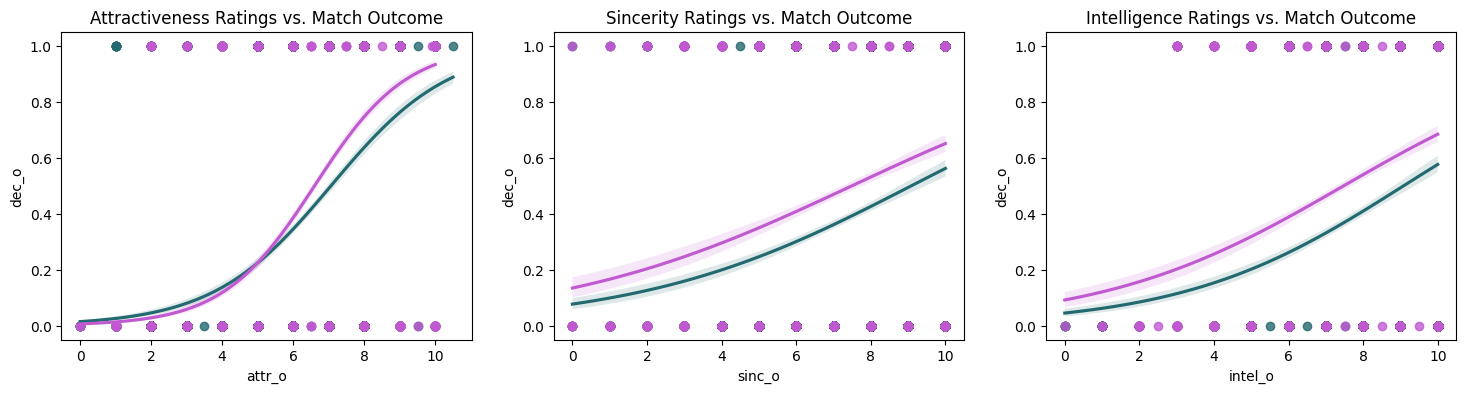

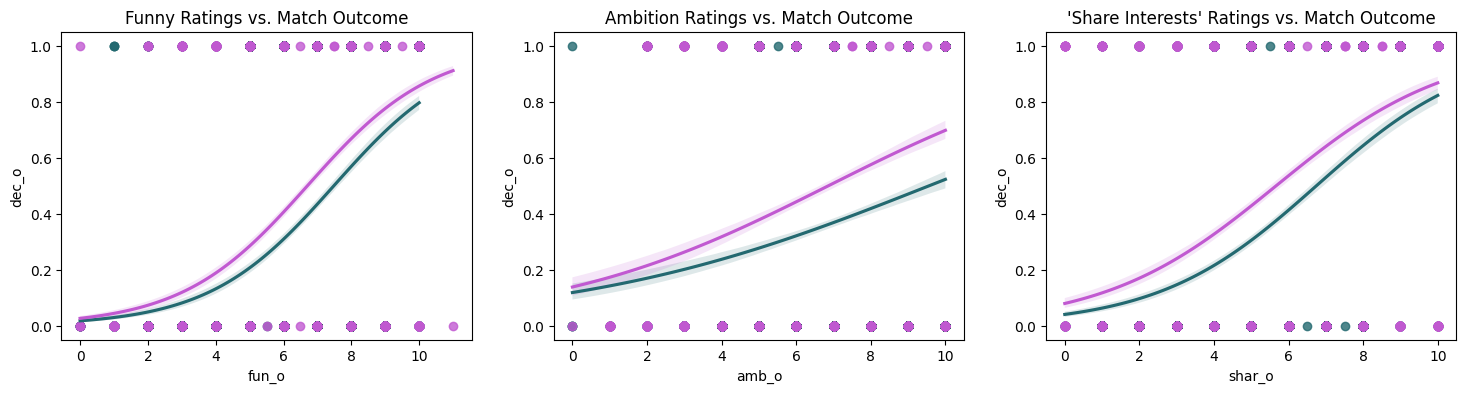

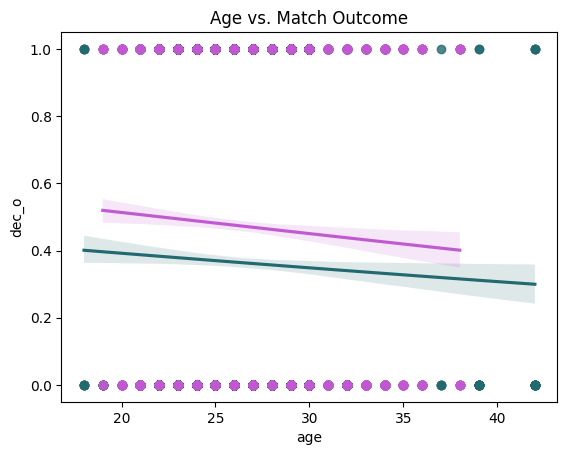

In [157]:
import statsmodels.api as sm

# Create a figure with 3 subplots
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
fig2, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# Create a scatter plot with a linear regression line showing the relationship between attractiveness ratings and the match outcome
sns.regplot(x="attr_o", y="dec_o", data=df[df['gender'] == 1], ax=ax1, color='#236970', logistic=True)
sns.regplot(x="attr_o", y="dec_o", data=df[df['gender'] == 0], ax=ax1, label='♀', color='#C159D1', logistic=True)
ax1.set_title("Attractiveness Ratings vs. Match Outcome")

# Create a scatter plot with a linear regression line showing the relationship between intelligence ratings and the match outcome
sns.regplot(x="sinc_o", y="dec_o", data=df[df['gender'] == 1], ax=ax2, color='#236970', logistic=True)
sns.regplot(x="sinc_o", y="dec_o", data=df[df['gender'] == 0], ax=ax2, label='♀', color='#C159D1', logistic=True)
ax2.set_title("Sincerity Ratings vs. Match Outcome")

# Create a scatter plot with a linear regression line showing the relationship between ambition ratings and the match outcome
sns.regplot(x="intel_o", y="dec_o", data=df[df['gender'] == 1], ax=ax3, color='#236970', logistic=True)
sns.regplot(x="intel_o", y="dec_o", data=df[df['gender'] == 0], ax=ax3, label='♀', color='#C159D1', logistic=True)
ax3.set_title("Intelligence Ratings vs. Match Outcome")

# Create a scatter plot with a linear regression line showing the relationship between ambition ratings and the match outcome
sns.regplot(x="fun_o", y="dec_o", data=df[df['gender'] == 1], ax=ax4, color='#236970', logistic=True)
sns.regplot(x="fun_o", y="dec_o", data=df[df['gender'] == 0], ax=ax4, label='♀', color='#C159D1', logistic=True)
ax4.set_title("Funny Ratings vs. Match Outcome")

# Create a scatter plot with a linear regression line showing the relationship between ambition ratings and the match outcome
sns.regplot(x="amb_o", y="dec_o", data=df[df['gender'] == 1], ax=ax5, color='#236970', logistic=True)
sns.regplot(x="amb_o", y="dec_o", data=df[df['gender'] == 0], ax=ax5, label='♀', color='#C159D1', logistic=True)
ax5.set_title("Ambition Ratings vs. Match Outcome")

# Create a scatter plot with a linear regression line showing the relationship between ambition ratings and the match outcome
sns.regplot(x="shar_o", y="dec_o", data=df[df['gender'] == 1], ax=ax6, color='#236970', logistic=True)
sns.regplot(x="shar_o", y="dec_o", data=df[df['gender'] == 0], ax=ax6, label='♀', color='#C159D1', logistic=True)
ax6.set_title("'Share Interests' Ratings vs. Match Outcome")

# Show the figure
plt.show()

# Create a scatter plot
sns.regplot(x="age", y="dec_o", data=df[df['gender'] == 1], color='#236970', logistic=True)
sns.regplot(x="age", y="dec_o",  data=df[df['gender'] == 0], label='♀', color='#C159D1', logistic=True)
plt.title('Age vs. Match Outcome')

# Show the plot
plt.show()

- Attractiveness and Being Funny come out as clear factors correlating with being selected by a partner : we have a clearly defined "S" shape of the logistic regression curve. Same for Sharing interests, however things are a bit nuanced here since the "S" shape is more stacked but there nonetheless.
- It is interesting to note that selected women have had in general higher Sincerity, Ambition and Intelligence scores than selected men
- Clearly, Age is negatively correlating with being selected : More so for Women than Men, which falls into what one might think naturally.

All in all, it is important to keep in mind that this data set is relatively too small for what we are trying to achieve here ! The more data we have the closer to reality we can be !